In [22]:
import csv
import pickle
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../../../utils/')
from cmptTheoreticalEmitGrowth import *
from bunchLengthConversions import *
from coordinatesConversions import *
from cmpt_TuneSpreads import *

### Plotting parameters

In [2]:
params = {'legend.fontsize': 20,
          'figure.figsize': (9.5, 8.5),
          'axes.labelsize': 27,
          'axes.titlesize': 23,
          'xtick.labelsize': 27,
          'ytick.labelsize': 27,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 10,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

### Study parameters

In [3]:
n_sets=20
n_runs=3
n_turns = int(1e5)            # number of cycles to run the simulation for
decTurns = int(100)           # how often to record data
circumference  = 6911.5623 # [m]
f_rev  = 299792458/circumference  # [Hz] The revolution frequency of the machine 
separationTime = 1 / f_rev * decTurns #There are decTurns revolutions before each recording of data
tspan = (np.arange(n_turns / decTurns) + 1.0) * separationTime #total time spanned by the simulationpan)

In [15]:
my_variables=list(np.linspace(0.0, 0.3, 25))
my_variables[0] = 1e-9
print(my_variables)

[1e-09, 0.012499999999999999, 0.024999999999999998, 0.0375, 0.049999999999999996, 0.06249999999999999, 0.075, 0.0875, 0.09999999999999999, 0.11249999999999999, 0.12499999999999999, 0.13749999999999998, 0.15, 0.16249999999999998, 0.175, 0.18749999999999997, 0.19999999999999998, 0.2125, 0.22499999999999998, 0.2375, 0.24999999999999997, 0.26249999999999996, 0.27499999999999997, 0.2875, 0.3]


In [23]:
QpxQpy=1

noise_type = 'PN'

path_to_data = './'
study_name='deyRates_updated_sps_270GeV_PN1e-8_400MHz_wakesON_QpxQpy1_6D_Nb5e5_turns1e5_ayy2000.0_sgimaZScan'

my_df = pickle.load( open(path_to_data+study_name+'.pkl', "rb" ))

In [17]:
my_df

,sigmaZ_0.000,sigmaZ_0.012,sigmaZ_0.025,sigmaZ_0.037,sigmaZ_0.050,sigmaZ_0.062,sigmaZ_0.075,sigmaZ_0.087,sigmaZ_0.100,sigmaZ_0.112,...,sigmaZ_0.187,sigmaZ_0.200,sigmaZ_0.212,sigmaZ_0.225,sigmaZ_0.237,sigmaZ_0.250,sigmaZ_0.262,sigmaZ_0.275,sigmaZ_0.287,sigmaZ_0.300
m,"[8.32142456148923e-08, 5.193891573423661e-08, ...","[1.4075526073508941e-09, 2.1511942472269188e-0...","[1.01739829357014e-09, 1.998032572517022e-09, ...","[1.061196259540541e-09, 2.71053249878669e-09, ...","[1.1365144526902168e-09, 1.4680704620315172e-0...","[1.6658791220187118e-09, 1.7888048032391776e-0...","[2.110020944342877e-09, 2.311006891069646e-09,...","[2.6456354231347166e-09, 3.2749625026693247e-0...","[3.9035952935407135e-09, 3.6223178927636045e-0...","[5.533448181177739e-09, 5.1834170320595756e-09...",...,"[1.6707631670314453e-08, 1.8225211783580813e-0...","[1.829169750872892e-08, 1.8204954178732477e-08...","[1.941109270432624e-08, 1.7943543525436658e-08...","[2.0624151166349057e-08, 1.8651510954487745e-0...","[2.0976309315183108e-08, 1.9892365276832308e-0...","[2.2218419490002252e-08, 2.1190873675805287e-0...","[2.3416823703547293e-08, 2.2873630199836044e-0...","[2.413866544014575e-08, 2.336290612470446e-08,...","[2.4988437942541354e-08, 2.4405142264084443e-0...","[2.555065941982442e-08, 2.529696419779392e-08,..."
b,"[2.292816426604875e-06, 2.2984237597031197e-06...","[2.2971866432014013e-06, 2.2986048613639722e-0...","[2.300398918123703e-06, 2.300150500225814e-06,...","[2.2991525222036804e-06, 2.3018967073350515e-0...","[2.300670977023328e-06, 2.3012016071311877e-06...","[2.2997677501758454e-06, 2.3025663845895796e-0...","[2.3003725520044164e-06, 2.298213716338597e-06...","[2.305141255638386e-06, 2.299809324878209e-06,...","[2.299681355743718e-06, 2.300468316536426e-06,...","[2.298128768331593e-06, 2.3039107862112924e-06...",...,"[2.3021087933183946e-06, 2.295962657839605e-06...","[2.301891339818795e-06, 2.3002542928739568e-06...","[2.3018323874176347e-06, 2.299769652813472e-06...","[2.299483643635579e-06, 2.298758734013157e-06,...","[2.3005291231255054e-06, 2.2971273862821996e-0...","[2.3019315970048926e-06, 2.2982082172940495e-0...","[2.2982595345081927e-06, 2.296161964481047e-06...","[2.3054859700194834e-06, 2.299877591984608e-06...","[2.2996010595627726e-06, 2.2988610562012655e-0...","[2.3020833636512483e-06, 2.2963108297637596e-0..."
err,"[2.5300735328802874e-10, 2.1209710706578191e-1...","[8.525816924374298e-12, 1.519640447347375e-11,...","[6.9337076610258444e-12, 1.6560480904492135e-1...","[1.2808676674872268e-11, 3.03348333305129e-11,...","[1.8563286144009242e-11, 1.680029799168708e-11...","[1.6314655700300702e-11, 1.861049134883528e-11...","[1.5851004862031535e-11, 1.9879868338208124e-1...","[2.1047438849062143e-11, 2.9276710619075776e-1...","[4.89758346709622e-11, 1.687384661047202e-11, ...","[2.7708340607640353e-11, 2.2918325262273255e-1...",...,"[9.685226604635931e-11, 8.824133238252004e-11,...","[9.61722196999643e-11, 8.160831764687961e-11, ...","[1.0309819251805447e-10, 6.883184168511586e-11...","[1.1257051164424255e-10, 6.612348284880758e-11...","[1.0967707330545759e-10, 7.21501304173517e-11,...","[1.1265304774198475e-10, 7.402818124387208e-11...","[1.2120815741865092e-10, 8.048874459064356e-11...","[1.1823541379987903e-10, 9.021695502910461e-11...","[1.1474301762877254e-10, 8.670301913857529e-11...","[1.108873924765351e-10, 8.70012523588357e-11, ..."


In [18]:
my_df_keys = list(my_df.keys()) # same keys for both data Frames
print(my_df_keys)

['sigmaZ_0.000', 'sigmaZ_0.012', 'sigmaZ_0.025', 'sigmaZ_0.037', 'sigmaZ_0.050', 'sigmaZ_0.062', 'sigmaZ_0.075', 'sigmaZ_0.087', 'sigmaZ_0.100', 'sigmaZ_0.112', 'sigmaZ_0.125', 'sigmaZ_0.137', 'sigmaZ_0.150', 'sigmaZ_0.162', 'sigmaZ_0.175', 'sigmaZ_0.187', 'sigmaZ_0.200', 'sigmaZ_0.212', 'sigmaZ_0.225', 'sigmaZ_0.237', 'sigmaZ_0.250', 'sigmaZ_0.262', 'sigmaZ_0.275', 'sigmaZ_0.287', 'sigmaZ_0.300']


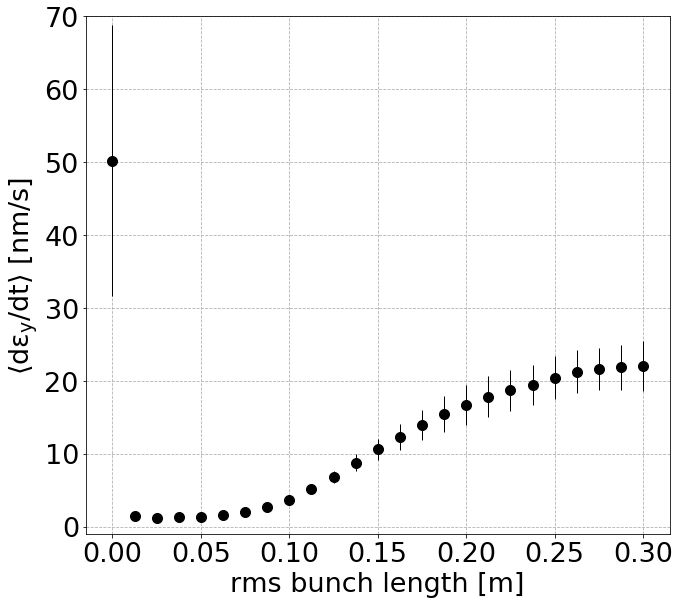

In [57]:
fig, ax = plt.subplots(1,1)

for i, key in enumerate(my_df_keys):
        
    # errors for study 1
    systematic_error_1 = np.std(my_df[key]['m'])
    statistical_error_1 = np.sqrt(np.mean(np.array(my_df[key]['err'])**2))
    total_error_1 = np.sqrt(systematic_error_1**2+statistical_error_1**2)
    
 
    ax.errorbar(my_variables[i], np.mean(my_df[key]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='k')#, label=my_label_1)
    
ax.set_xlabel('rms bunch length [m]')
ax.set_ylabel(r'$\mathrm{\langle d\epsilon_y / dt \rangle \ [nm/s] }$')

ax.set_ylim(-1, 70)
plt.grid(linestyle='dashed')


#ax.legend(loc=2, frameon=False, handles=[err1, theory[0], vspan])

plt.tight_layout()

savefig = False
if savefig:
    plt.savefig(f'./figures/{study_name}Scan.png', bbox_inches='tight')

## Compare with the theoretical expected growth without the wakes

In [21]:
# Machine parameters
betay = 73.81671646 # 73 m at CC2, 76 m at CC1
clight = 299792458 # m/s
Vcc = 1e6 # V
Eb = 270e9 # eV
gamma_0 = 287.8 
beta_0 = np.sqrt(1 - 1/gamma_0**2)
circumference = 6911.5623 # m
frev = 299792458/circumference # Hz
f_CC = 400e6 # CC frequency in Hz

# Noise kick parameters
A_phase = 1e-8 # rms kick in the simulation of the phase noise
A_amplitude = 0 # rms kick in the simulation of the amplitude noise
scale_factor = Eb/Vcc # scaling factor to rms noise, σ
# Compute the PSD in rad^2/Hz and V^2/Hz
PSD_phi = (A_phase * scale_factor)**2/frev # rad^2/Hz
#PSD_phi = 1.42e-10
#PSD_phi = 1.4e-10
PSD_A = (A_amplitude * scale_factor)**2/frev # V^2/Hz
print(f'psd phi: {PSD_phi} rad^2/Hz, psd A: {PSD_A} V^2/Hz')

psd phi: 1.6806723392287607e-10 rad^2/Hz, psd A: 0.0 V^2/Hz


In [26]:
# Compute the correction factor due to the bunch length
sigma_z = np.array(my_variables)
sigma_phi = bunch_length_m_to_rad(sigma_z, clight, f_CC)
CDeltaphi = cmpt_bunch_length_correction_factor(sigma_phi, 'PN')
CDeltaA = cmpt_bunch_length_correction_factor(sigma_phi, 'AN')
print('CDeltaPhi = {}, CDeltaA = {}'.format(CDeltaphi, CDeltaA))

if noise_type == 'PN':
    expected_growth = emit_growth_phase_noise(betay, Vcc, frev, Eb, CDeltaphi, PSD_phi, one_sided_psd=False)*beta_0*gamma_0 # m/s
    my_color = 'C0'
    fill_bewtween_color = 'lightblue'
elif noise_type == 'AN':
    expected_growth = emit_growth_amplitude_noise(betay, Vcc, frev, Eb, CDeltaA, PSD_A, one_sided_psd=False)*beta_0*gamma_0 # m/s
    my_color = 'C1'
    fill_bewtween_color = 'moccasin'
else:
    my_color = 'C2'
    expected_growth_1 = emit_growth_phase_noise(betay, Vcc, frev, Eb, CDeltaphi, PSD_phi, one_sided_psd=False)*beta_0*gamma_0 # m/s
    expected_growth_2 = emit_growth_amplitude_noise(betay, Vcc, frev, Eb, CDeltaA, PSD_A, one_sided_psd=False)*beta_0*gamma_0 # m/s
    expected_growth = expected_growth_1 + expected_growth_2

print('expected growth = {} nm/s'.format(expected_growth*1e9))

CDeltaPhi = [1.         0.9891383  0.95794852 0.91032216 0.85184924 0.78874308
 0.72677224 0.67044784 0.62260734 0.58440433 0.55560788 0.53506156
 0.52115678 0.51221775 0.50675237 0.50357145 0.50180782 0.50087577
 0.50040602 0.50018015 0.5000765  0.50003109 0.50001209 0.5000045
 0.5000016 ], CDeltaA = [3.51405308e-17 5.43085121e-03 2.10257411e-02 4.48389189e-02
 7.40753797e-02 1.05628459e-01 1.36613881e-01 1.64776079e-01
 1.88696332e-01 2.07797834e-01 2.22196060e-01 2.32469219e-01
 2.39421611e-01 2.43891127e-01 2.46623817e-01 2.48214276e-01
 2.49096089e-01 2.49562114e-01 2.49796989e-01 2.49909926e-01
 2.49961752e-01 2.49984457e-01 2.49993955e-01 2.49997750e-01
 2.49999199e-01]
expected growth = [46.07415415 45.5737104  44.13666768 41.94232363 39.24823322 36.34067036
 33.4854161  30.89031725 28.68610641 26.92593527 25.59916312 24.65250892
 24.01185772 23.59999941 23.34818666 23.20162849 23.12037098 23.0774275
 23.05578417 23.04537726 23.04060154 23.03850933 23.0376341  23.0372844
 23.03

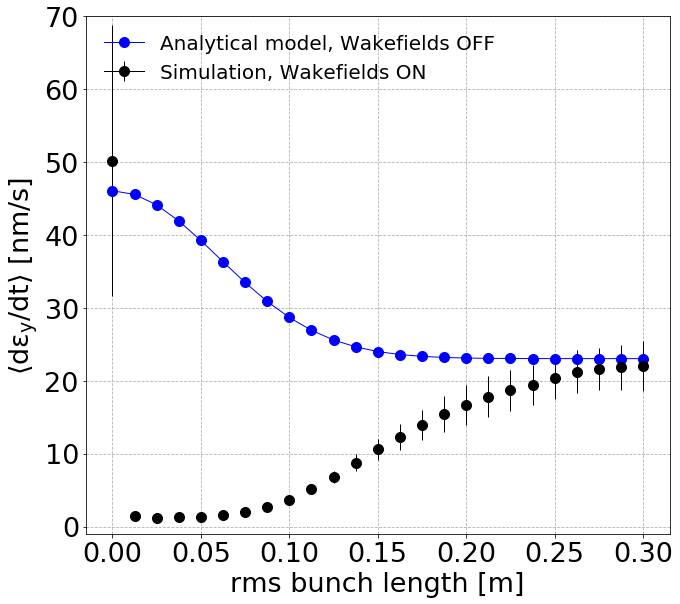

In [59]:
fig, ax = plt.subplots(1,1)

for i, key in enumerate(my_df_keys):
        
    # errors for study 1
    systematic_error_1 = np.std(my_df[key]['m'])
    statistical_error_1 = np.sqrt(np.mean(np.array(my_df[key]['err'])**2))
    total_error_1 = np.sqrt(systematic_error_1**2+statistical_error_1**2)
    
    if i == 0:
        err1= ax.errorbar(my_variables[i], np.mean(my_df[key]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='k', label='Simulation, Wakefields ON')
    else:
        ax.errorbar(my_variables[i], np.mean(my_df[key]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='k')#, label=my_label_1)
ax.set_xlabel('rms bunch length [m]')
ax.set_ylabel(r'$\mathrm{\langle d\epsilon_y / dt \rangle \ [nm/s] }$')

ax.plot(my_variables, expected_growth*1e9, '-o', c='b', label='Analytical model, Wakefields OFF')


ax.set_ylim(-1, 70)
plt.grid(linestyle='dashed')


ax.legend(loc=2, frameon=False, handles=[theory[0], err1])

plt.tight_layout()

savefig = False
if savefig:
    plt.savefig(f'./figures/{study_name}ScanZvsTheorywithoutWakes.png', bbox_inches='tight')

### Add area of realistic tune spread for SPS

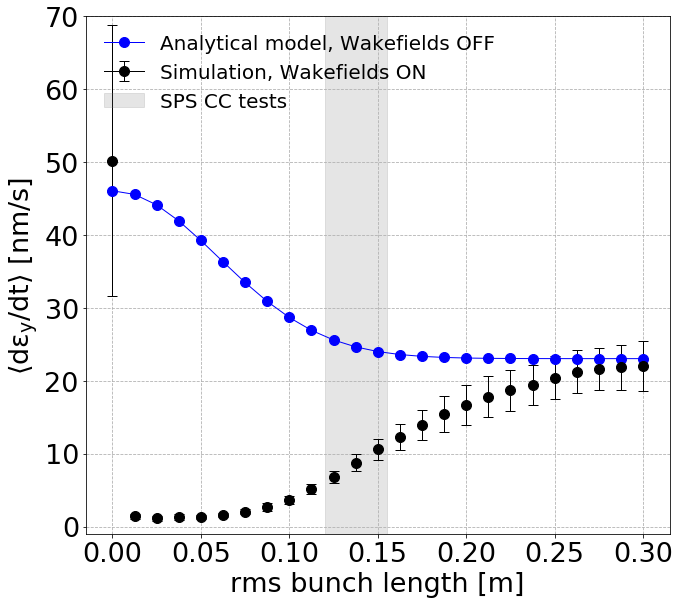

In [68]:
fig, ax = plt.subplots(1,1)

mean_dey = []

for i, key in enumerate(my_df_keys):
          
    # errors for study 1
    systematic_error_1 = np.std(my_df[key]['m'])
    statistical_error_1 = np.sqrt(np.mean(np.array(my_df[key]['err'])**2))
    total_error_1 = np.sqrt(systematic_error_1**2+statistical_error_1**2)
    
    #mean_dey.append(np.mean(my_df[key]['m'])*1e9)
    
    if i == 0:
        err1= ax.errorbar(my_variables[i], np.mean(my_df[key]['m'])*1e9, yerr=total_error_1*1e9, marker='o', capsize=5, c='k', label='Simulation, Wakefields ON')
    else:
        ax.errorbar(my_variables[i], np.mean(my_df[key]['m'])*1e9, yerr=total_error_1*1e9, marker='o', capsize=5, c='k')#, label=my_label_1)
    
    
# plotting line
#ax.plot(my_variables, mean_dey, ls='-',c='k')
    
ax.set_xlabel('rms bunch length [m]')
ax.set_ylabel(r'$\mathrm{\langle d\epsilon_y / dt \rangle \ [nm/s] }$')

theory = ax.plot(my_variables, expected_growth*1e9, 'o-', c='b', label='Analytical model, Wakefields OFF')

vspan = ax.axvspan(0.12 , 0.155, alpha=0.2, color='grey', label='SPS CC tests')

ax.legend(loc=2, frameon=False, handles=[theory[0], err1, vspan])


ax.set_ylim(-1, 70)
plt.grid(linestyle='dashed')

plt.tight_layout()

savefig = False
if savefig:
    plt.savefig(f'./figures/{study_name}ScanZvsTheorywithoutWakesVSSPSsigmaZ.png', bbox_inches='tight')